In [1]:
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Dùng thư viện yfinance để tải dataset 
import yfinance as yf

start_date = '2017-01-01'
end_date = '2023-05-05'
symbol = 'AMZN' #  Apple Inc.

data = yf.download(symbol, start=start_date, end=end_date)
data.to_csv('Amazon_stock_data.csv')

[*********************100%***********************]  1 of 1 completed


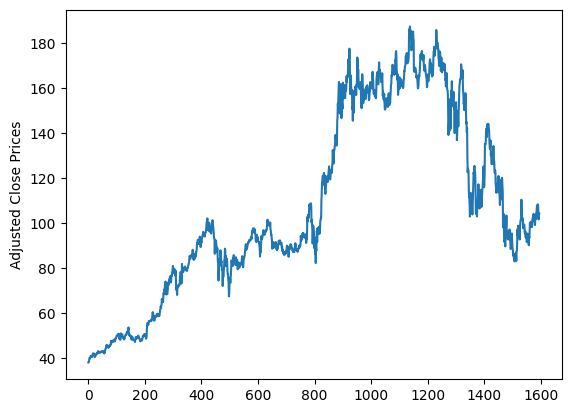

In [3]:
read_df = pd.read_csv("Amazon_stock_data.csv")
read_df.reset_index(inplace=True)
read_df['Open'].plot()
plt.ylabel("Adjusted Close Prices")
plt.show()

In [4]:
read_df

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2017-01-03,37.896000,37.938000,37.384998,37.683498,37.683498,70422000
1,1,2017-01-04,37.919498,37.984001,37.709999,37.859001,37.859001,50210000
2,2,2017-01-05,38.077499,39.119999,38.013000,39.022499,39.022499,116602000
3,3,2017-01-06,39.118000,39.972000,38.924000,39.799500,39.799500,119724000
4,4,2017-01-09,39.900002,40.088501,39.588501,39.846001,39.846001,68922000
...,...,...,...,...,...,...,...,...
1590,1590,2023-04-28,107.730003,109.480003,104.330002,105.449997,105.449997,130565000
1591,1591,2023-05-01,104.949997,105.230003,101.820000,102.050003,102.050003,74728100
1592,1592,2023-05-02,101.470001,103.900002,101.150002,103.629997,103.629997,73469400
1593,1593,2023-05-03,103.739998,105.959999,103.279999,103.650002,103.650002,65051900


In [5]:
df = pd.read_csv("Amazon_stock_data.csv")
df.set_index("Date", inplace=True)
df.dropna(inplace=True)

In [6]:
x = df.iloc[:, 0:5].values
y = df.iloc[:, 0].values

In [7]:

# Chia dữ liệu thành tập huấn luyện và tập còn lại
x_train, x_remain, y_train, y_remain = train_test_split(x, y, test_size=0.3, random_state=42)

# Chia tập còn lại thành tập kiểm tra và tập xác thực
x_test, x_val, y_test, y_val = train_test_split(x_remain, y_remain, test_size=0.33, random_state=42)



In [8]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)
x_val = scale.transform(x_val)


In [9]:
model=RandomForestRegressor()

In [10]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 30, 'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 9, 'bootstrap': True}


In [11]:
best_parameters

{'random_state': 30,
 'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 9,
 'bootstrap': True}

In [12]:
model = RandomForestRegressor(n_estimators=best_parameters['n_estimators'], random_state=best_parameters['random_state'], min_samples_split=best_parameters['min_samples_split'], 
                              min_samples_leaf=best_parameters['min_samples_leaf'], max_depth=best_parameters['max_depth'], bootstrap=best_parameters['bootstrap'])
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict)
print(predict.shape)
predict_val = model.predict(x_val)
print(predict_val)
print(predict_val.shape)

[ 83.50038463  56.65260031 134.37013602  48.4318025   49.26331119
 158.3357378  167.52083776  52.43459424 132.21020194 158.22263795
 172.50185984 106.4141201   92.97041163  80.46103165 180.46950902
  93.04183365  79.0574766  156.11112569 174.46246632 112.87190798
  50.34522686  91.06031205 140.89556323  71.28261481  86.51043219
 148.9278713  159.72567144 175.4970094  126.29837001 113.47159152
  73.76884757 105.33082046 110.03936354  87.46607532  56.39350227
  99.76030013  85.48773278 169.47218702  96.84274495 101.05959685
 160.02712056  83.98289363  85.16722703  45.16584156  77.18786696
 167.44302559  96.95000325 177.75131881  80.12007454  50.47986057
 168.93188932  83.00339355 170.85457282 170.18960733 101.28830255
 170.32523667  95.62170267 153.96825367 104.59158337  58.32564358
  84.9065203   95.33875413  97.5493051  162.21554824 113.57197094
  82.03871859 164.57062402 177.68546886 116.46693824  45.47264181
 161.2113655  159.05449342 157.73094797 166.91613871  47.28796327
  47.42956

In [13]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))


Mean Absolute Error: 0.1232
Mean Squared Error: 0.057
Root Mean Squared Error: 0.2387
(R^2) Score: 1.0


In [14]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_val, predict_val), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_val, predict_val), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_val, predict_val)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_val, predict_val), 4))


Mean Absolute Error: 0.1265
Mean Squared Error: 0.0587
Root Mean Squared Error: 0.2422
(R^2) Score: 1.0


In [15]:
y_val

array([ 89.40750122,  85.33000183, 165.99850464,  81.15000153,
        48.20000076,  47.29999924, 160.56300354, 155.05000305,
       169.41799927,  90.35399628, 114.79000092,  77.        ,
       146.74850464,  58.60250092,  74.19999695,  96.54299927,
       122.2559967 ,  56.50799942, 153.69250488,  95.35849762,
        49.84049988,  88.90049744, 172.90299988,  97.38999939,
        68.07299805, 164.74949646,  67.30000305,  71.49849701,
        96.65450287,  48.86249924,  42.09199905,  78.79949951,
       150.92649841,  47.87099838,  79.125     ,  83.52500153,
       175.58250427, 154.01150513, 163.72950745,  86.92649841,
       110.23999786, 107.97000122,  85.25350189,  72.25      ,
       103.52999878,  76.22499847,  92.25350189, 100.32550049,
       113.58000183,  76.94999695,  81.17649841, 158.52000427,
        83.6269989 ,  63.66949844,  48.95000076, 112.81900024,
       127.91999817, 103.65550232, 101.58000183, 107.66000366,
        83.23449707, 161.62449646,  94.92500305,  98.41

In [16]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=df.index[-1], periods=len(predict), freq="D"))
predictions.to_csv("Predicted-price-data.csv")
#colllects future days from predicted values

onemonth_df = pd.DataFrame(predictions[:21])
onemonth_df.to_csv("one-month-predictions.csv")


In [17]:
onemonth_df

,Predictions
2023-05-04,83.500385
2023-05-05,56.652600
2023-05-06,134.370136
2023-05-07,48.431803
2023-05-08,49.263311
2023-05-09,158.335738
2023-05-10,167.520838
2023-05-11,52.434594
2023-05-12,132.210202
2023-05-13,158.222638


In [18]:
onemonth_df.reset_index(inplace=True)

In [19]:
onemonth_df

,index,Predictions
0,2023-05-04,83.500385
1,2023-05-05,56.652600
2,2023-05-06,134.370136
3,2023-05-07,48.431803
4,2023-05-08,49.263311
5,2023-05-09,158.335738
6,2023-05-10,167.520838
7,2023-05-11,52.434594
8,2023-05-12,132.210202
9,2023-05-13,158.222638


In [20]:
y_test

array([ 83.53749847,  56.4129982 , 135.72000122,  48.41600037,
        49.19850159, 158.25      , 167.55000305,  52.15999985,
       130.91000366, 158.13450623, 172.63299561, 106.25099945,
        93.05000305,  80.54949951, 179.36149597,  93.        ,
        78.875     , 156.1000061 , 173.8500061 , 113.09999847,
        50.29750061,  91.0510025 , 139.8374939 ,  71.48400116,
        86.58149719, 148.5       , 159.75      , 175.25      ,
       126.33000183, 113.27500153,  73.66750336, 105.04000092,
       110.38999939,  87.51000214,  56.15000153,  99.79000092,
        85.45200348, 169.51649475,  96.84999847, 101.16999817,
       160.06350708,  83.97499847,  85.12550354,  44.98149872,
        77.33450317, 167.34150696,  96.93000031, 176.94999695,
        80.19999695,  50.625     , 168.95599365,  83.12000275,
       170.7124939 , 170.10499573, 101.31999969, 170.38400269,
        95.63300323, 154.05900574, 104.25050354,  58.22999954,
        84.96199799,  95.37000275,  97.57499695, 162.19

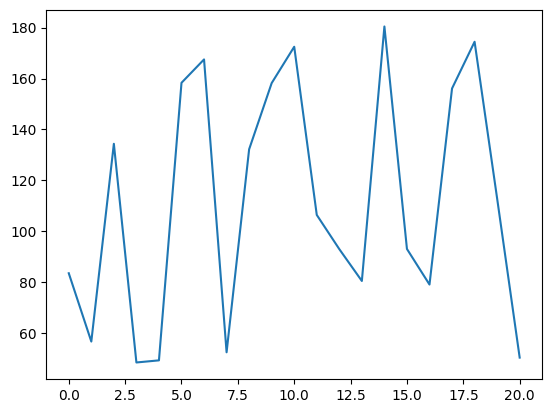

In [21]:

plt.plot( onemonth_df['Predictions'])
plt.show()